In [14]:
using PyPlot;

# Problem 2

Consider a particle in two dimensions, $x$ and $y$. The particle has mass $m$, equal in both directions. The potential energy is $V=\frac{1}{2}k(x^2+y^2)$. Work out the equations of motion. Show that there are circular orbits and that all orbits have the same period. Prove explicitly that the total energy is conserved.

## Solution

The force on the particle is given by 
$$
\begin{align*}
    F &= - \nabla V\\
    &= -k\begin{bmatrix}
    x\\
    y
    \end{bmatrix}
\end{align*}
$$

Using Newton's law, the equations of motion are given by the differential equation
$$
\begin{align*}
m\ddot{r}(t) &= -k\begin{bmatrix}
    x(t)\\
    y(t)
    \end{bmatrix}
\end{align*}
$$

The equation $\ddot{x}(t) = -\frac{k}{m}x(t)$ has solution $x(t) = x_0\cos(\omega t) + \frac{v_{0x}}{\omega} \sin(\omega t)$ where $\omega = \sqrt{k/m}$ as given by Exercise 4 of chapter 3. So the equations of motion are 

$$
\begin{align*}
x(t) &= x_0\cos(\omega t) + \frac{v_{0x}}{\omega} \sin(\omega t)\\
y(t) &= y_0\cos(\omega t) + \frac{v_{0y}}{\omega} \sin(\omega t)
\end{align*}
$$

The kinetic energy of the particle is given by 
$$
\begin{align*}
T &= 0.5 m \left[\left(-x_0\omega \sin(\omega t) + v_{0x} \cos(\omega t)\right)^2 + \left(-y_0 \omega \sin(\omega t) + v_{0y} \cos(\omega t)\right)^2\right]\\
&= 0.5m\left(x_0^2\omega^2\sin^2(\omega t) + v_{0x}^2\cos^2(\omega t) - 2x_0v_{0x}\omega\sin(\omega t)\cos(\omega t)
+ y_0^2\omega^2\sin^2(\omega t) + v_{0y}^2\cos^2(\omega t) - 2y_0v_{0y}\omega\sin(\omega t)\cos(\omega t)\right)\\
&= 0.5m\left(\omega^2(x_0^2+y_0^2)\sin^2(\omega t) + (v_{0x}^2 + v_{0y}^2)\cos^2(\omega t) - 2(x_0v_{0x} + y_0v_{0y})\omega\sin(\omega t)\cos(\omega t) \right)\\
&= 0.5m\left(k/m(x_0^2+y_0^2)\sin^2(\omega t) + (v_{0x}^2 + v_{0y}^2)\cos^2(\omega t) - 2(x_0v_{0x} + y_0v_{0y})\omega \sin(\omega t)\cos(\omega t) \right)
\end{align*}
$$

The potential energy is given by 
$$
\begin{align*}
V &= 0.5k\left[\left(x_0 \cos(\omega t) + v_{0x}/\omega \sin(\omega t)\right)^2 + \left(y_0 \cos(\omega t) + v_{0y}/\omega \sin(\omega t)\right)^2\right]\\
&= 0.5k\left((x_0^2+y_0^2)\cos^2(\omega t) + \frac{1}{\omega^2}(v_{0x}^2 + v_{0y}^2)\sin^2(\omega t) - \frac{2}{\omega}(x_0v_{0x} + y_0v_{0y})\sin(\omega t)\cos(\omega t) \right)\\
&= 0.5k\left((x_0^2+y_0^2)\cos^2(\omega t) + \frac{m}{k}(v_{0x}^2 + v_{0y}^2)\sin^2(\omega t) - \frac{2}{\omega}(x_0v_{0x} + y_0v_{0y})\sin(\omega t)\cos(\omega t) \right)
\end{align*}
$$

The total energy of the system is then
$$
\begin{align*}
E &= T + V\\
&= 0.5k(x_0^2+y_0^2) + 0.5 m(v_{0x}^2 + v_{0y}^2)
\end{align*}
$$

which is independent of time, showing that energy is conserved.

Circular orbits exist when 
$$
\begin{align*}
x_0^2 + y_0^2 &= \frac{m}{k} (v_{0x}^2 + v_{0y}^2)\\
x_0v_{0x} &= -y_0v_{0y}\\
\end{align*}
$$

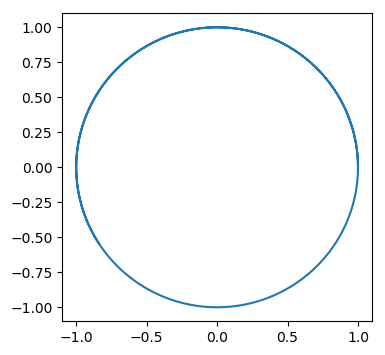

In [23]:
k = 1
m = 1
omega = sqrt(k / m);

x0 = vec([1 0])
v0 = vec([0 omega])

t_vals = vec(LinRange(0, 10, 1000));
position = x0 * cos.(omega * transpose(t_vals)) + v0 / omega * sin.(omega * transpose(t_vals));

figure(figsize=(4,4))
plot(position[1,:], position[2,:]);

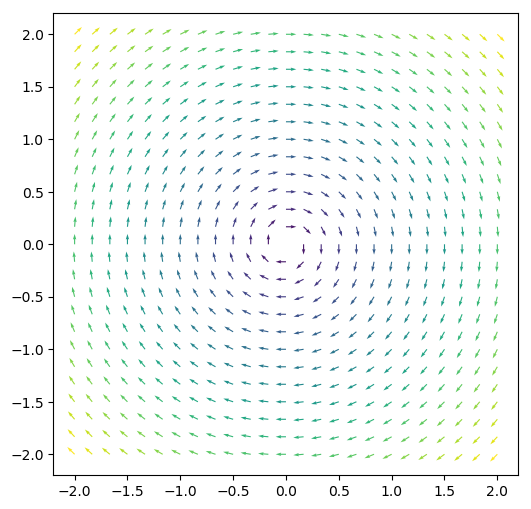

In [12]:
k = 1
m = 1
A = [0 1; -k/m 0]

x_vals = LinRange(-2, 2, 25)
y_vals = LinRange(-2, 2, 25)

figure(figsize=(6,6))
X_mesh = [i for i in x_vals, j in y_vals]
Y_mesh = [j for i in x_vals, j in y_vals]

x_plot = vec(X_mesh)
y_plot = vec(Y_mesh)

time_derivatives = A * transpose(hcat(x_plot, y_plot))

dx = vec(time_derivatives[1,:])
dy = vec(time_derivatives[2,:])

grad_field_norms = [hypot(dx[i],  dy[i]) for i in 1:length(x_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

quiver(x_plot, y_plot, 
    dx ./ grad_field_norms, dy ./ grad_field_norms, 
    color=PyPlot.cm.viridis((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");

# Exercise 3

Rework Exercise 2 for the potential $V = \frac{k}{2(x^2+y^2)}$. Are there circular orbits? If so, do they all have the same period? Is the total energy conserved?

## Solution

Again by Newton's Law we get the equations

$$
\begin{align*}
m\ddot{r}(t) &=
\begin{bmatrix}
- \frac{k}{2(x^2+y^2)^2}\cdot 2x\\
- \frac{k}{2(x^2+y^2)^2}\cdot 2y\\
\end{bmatrix}\\
m\begin{bmatrix}
\ddot{x}(t)\\
\ddot{y}(t)\\
\end{bmatrix}
&= - \frac{k}{(x^2+y^2)^2}
\begin{bmatrix}
x\\
y
\end{bmatrix}
\end{align*}
$$


Switching to polar coordinates we have
$$
\begin{align*}
x(t) &= r\cos \theta\\
y(t) &= r \sin \theta
\end{align*}
$$

The first derivatives in polar coordinates is
$$
\begin{align*}
\dot{x}(t) &= \dot{r}\cos \theta - r\dot{\theta}\sin \theta\\
\dot{y}(t) &= \dot{r}\sin \theta + r\dot{\theta}\cos \theta\\
\end{align*}
$$

The accelerations are
$$
\begin{align*}
\ddot{x}(t) &= \ddot{r}\cos \theta - \dot{r}\dot{\theta}\sin \theta - \dot{r}\dot{\theta}\sin \theta - r\ddot{\theta}\sin \theta -r(\dot{\theta})^2\cos \theta\\
&= \left(\ddot{r} - \dot{r}(\dot{\theta})^2\right)\cos \theta - (2\dot{r}\dot{\theta} + r \ddot{\theta})\sin \theta\\
\ddot{y}(t) &= \ddot{r}\sin \theta + \dot{r}\dot{\theta}\cos \theta + \dot{r}\dot{\theta}\cos \theta + r\ddot{\theta}\cos \theta -r(\dot{\theta})^2\sin \theta\\
&= \left(\ddot{r} + \dot{r}(\dot{\theta})^2\right)\sin \theta + (2\dot{r}\dot{\theta} + r \ddot{\theta})\cos \theta\\
\end{align*}
$$

The equations of motions in polar coordinates are 
$$
\begin{align}
\left(\ddot{r} - \dot{r}(\dot{\theta})^2\right)\cos \theta - (2\dot{r}\dot{\theta} + r \ddot{\theta})\sin \theta &= -\frac{k/m}{r^4}r\cos \theta\\
\left(\ddot{r} - \dot{r}(\dot{\theta})^2\right)\sin \theta - (2\dot{r}\dot{\theta} + r \ddot{\theta})\cos \theta &= -\frac{k/m}{r^4}r\sin \theta\\
\end{align}
$$

Multiplying the first equation by $\cos \theta$, the second by $\sin \theta$, and adding them yields
$$
\ddot{r}-\dot{r}(\dot{\theta})^2 = -2\frac{k/m}{r^3}
$$
Now multiplying the first equation by $\sin \theta$, the second by $\cos \theta$, and subtracting them yields
$$
2\dot{r}\dot{\theta}+r\ddot{\theta} = 0
$$

Defining $\omega = \dot{\theta}$, the second question is solved by separation of variables
$$
\begin{align*}
r\dot{\omega} &= -2\dot{r}\omega\\
\implies \frac{d\omega}{\omega} &= -2\frac{dr}{r}\\
\implies \log \omega &= -2\log r + C\\
\implies \dot{\theta} &= \frac{C}{r^2}
\end{align*}
$$

Plugging into the second order differential equation for $r$ gives
$$
\begin{align*}
\ddot{r}-\dot{r}\left(\frac{C}{r^2}\right)^2 &= -2\frac{k/m}{r^3}\\
\ddot{r} &= -2\frac{k/m}{r^3}+\dot{r}\frac{C^2}{r^4}\\
\end{align*}
$$
This can be written as a system of first order differential equations
$$
\begin{align*}
\dot{r} &=\rho \\
\dot{\rho} &= -2\frac{k/m}{r^3}+\rho\frac{C^2}{r^4}\\
\end{align*}
$$

For circular orbits to exist, $r(t)$ will be constant which implies $\dot{r} = 0$ for all time. Plugging into the differential equation, we find there are no non-zero values of $k$ that will result in a constant $r$.

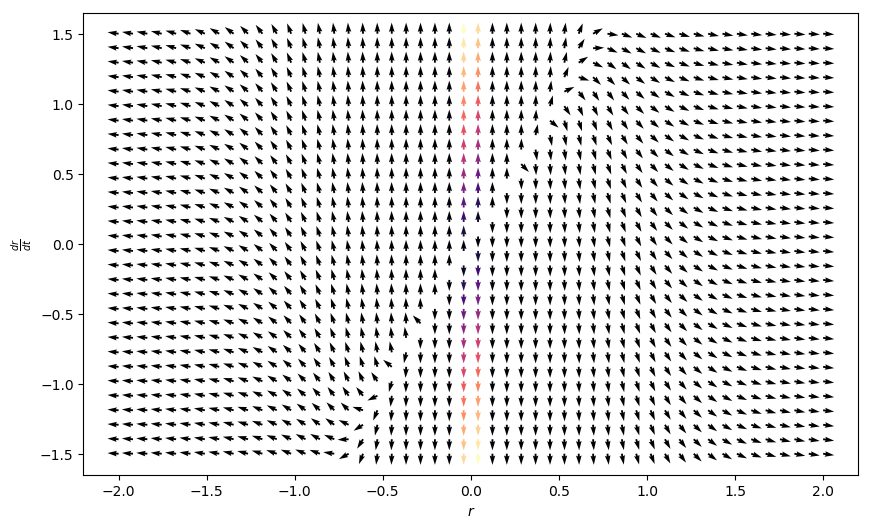

In [39]:
k = 1
m = 1
c = 1

n_x = 50
n_y = 30

x_vals = LinRange(-2, 2, n_x)
y_vals = LinRange(-1.5, 1.5, n_y)

figure(figsize=(10,6))
r_mesh = [i for i in x_vals, j in y_vals]
rho_mesh = [j for i in x_vals, j in y_vals]

r_plot = vec(r_mesh)
rho_plot = vec(rho_mesh)

dr = r_plot
drho = -2 * (k/m) ./ r_plot .^ 3 + c^2 * rho_plot ./ r_plot .^ 4

grad_field_norms = [hypot(dr[i],  drho[i]) for i in 1:length(r_plot)] 
max_norm = maximum(grad_field_norms)
min_norm = minimum(grad_field_norms)

intensity = log1p.((grad_field_norms .- min_norm) / (max_norm - min_norm))

quiver(r_plot, rho_plot, 
    dr ./ grad_field_norms, drho ./ grad_field_norms,
    color=PyPlot.cm.magma((grad_field_norms .- min_norm) / (max_norm - min_norm)), angles="xy");

xlabel(L"$r$");
ylabel(L"$\frac{dr}{dt}$");

In [33]:
minimum((grad_field_norms .- min_norm) / (max_norm - min_norm))

0.0

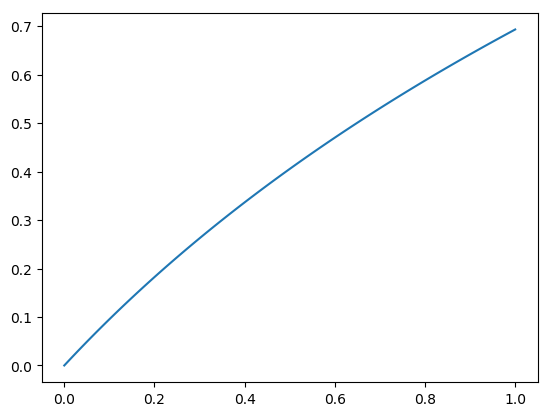

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x150e3b6a0>

In [35]:
t_vals = LinRange(0, 1, 100)
plot(t_vals, log1p.(t_vals))